In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [22]:
def transpose_data(data):
    data_by_name = {'param':[]}
    for param in data.keys():
        metric = data[param]
        for metric_name in metric.keys():
            if metric_name not in data_by_name.keys(): data_by_name[metric_name] = []
            data_by_name[metric_name].append(metric[metric_name])
        data_by_name['param'].append(int(param))
    df = pd.DataFrame(data_by_name)
    return df

In [23]:
result_file = '../../results/hdbscan_caterpillar.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df = transpose_data(data)

<AxesSubplot: xlabel='IoU_recall', ylabel='IoU_precision'>

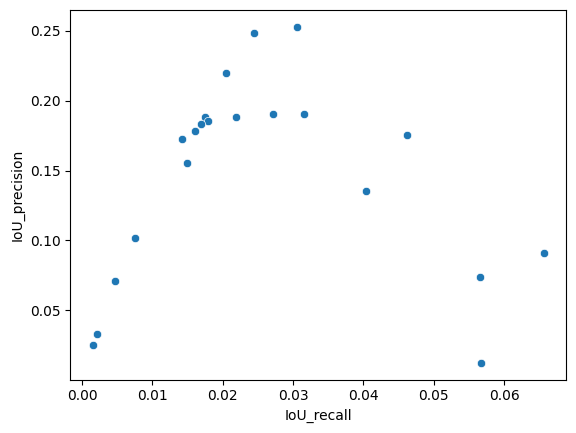

In [24]:
sns.scatterplot(data=df, x='IoU_recall', y='IoU_precision')

<AxesSubplot: xlabel='param', ylabel='IoU_F1'>

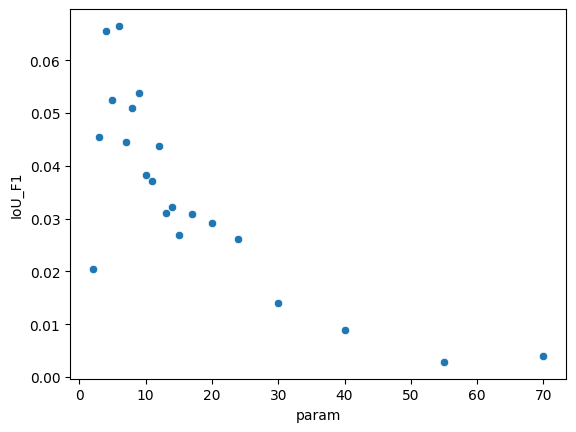

In [25]:
sns.scatterplot(data=df, x='param', y='IoU_F1')

In [26]:
result_file2 = '../../results/gmm_caterpillar.json'
with open(result_file2, 'r') as f:
    data2 = json.load(f)
df2 = transpose_data(data2)

<AxesSubplot: xlabel='IoU_recall', ylabel='IoU_precision'>

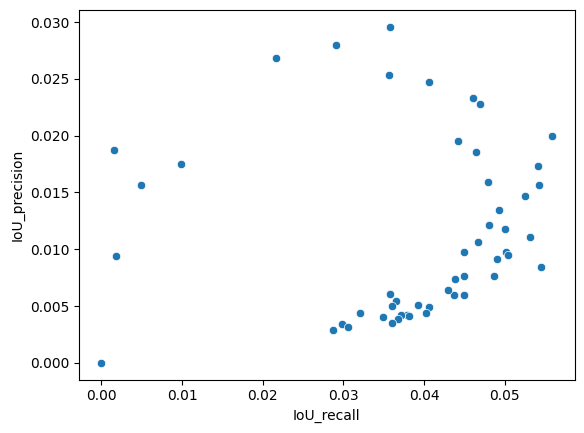

In [27]:
sns.scatterplot(data=df2, x='IoU_recall', y='IoU_precision')

<AxesSubplot: xlabel='param', ylabel='IoU_recall'>

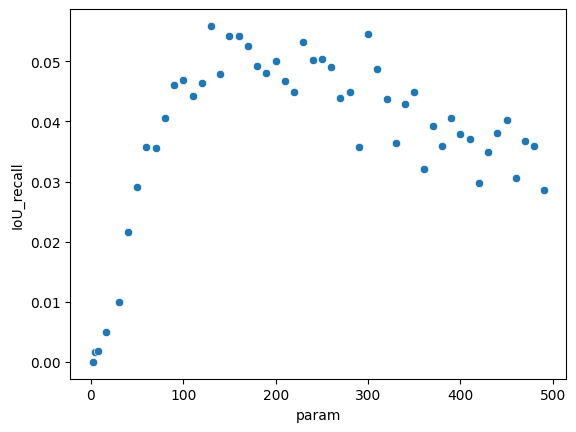

In [30]:
sns.scatterplot(data=df2, x='param', y='IoU_recall')

In [31]:
result_file = '../../results/leaf_hdbscan_caterpillar.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df3 = transpose_data(data)

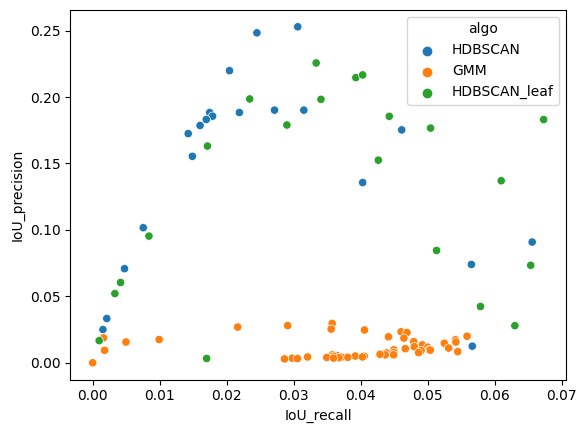

In [33]:
df['algo'] = 'HDBSCAN'
df2['algo'] = 'GMM'
df3['algo'] = 'HDBSCAN_leaf'
df_total = pd.concat([df, df2, df3], ignore_index=True)
plot = sns.scatterplot(data=df_total, x='IoU_recall', y='IoU_precision', hue='algo')

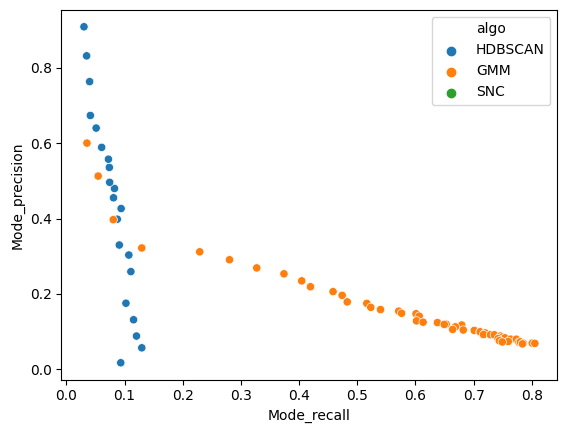

In [19]:
plot = sns.scatterplot(data=df_total, x='Mode_recall', y='Mode_precision', hue='algo')

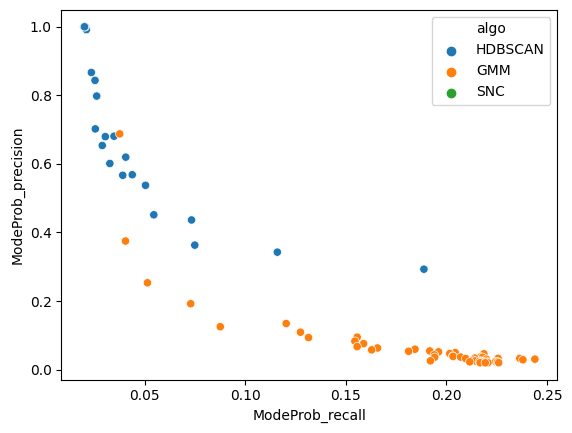

In [24]:
plot = sns.scatterplot(data=df_total, x='ModeProb_recall', y='ModeProb_precision', hue='algo')

In [25]:
df_total.head()

,param,IoU_TP,IoU_T,IoU_P,IoU_precision,IoU_recall,IoU_F1,Mode_TP,Mode_T,Mode_P,...,Purity,AMI,ARand,ModeProb_TP,ModeProb_T,ModeProb_P,ModeProb_precision,ModeProb_recall,ModeProb_F1,algo
0,2.0,3.950,55.550,36.425,0.100607,0.065043,0.078019,9.050,55.550,36.425,...,0.351037,0.110710,0.015261,10.525,55.550,36.425,0.292849,0.188841,0.227146,HDBSCAN
1,3.0,1.875,55.875,18.675,0.080747,0.029934,0.043230,5.550,55.875,18.675,...,0.276544,0.094019,0.010664,6.375,55.875,18.675,0.342531,0.116008,0.171456,HDBSCAN
2,4.0,1.650,56.975,11.900,0.113591,0.025235,0.040946,4.650,56.975,11.900,...,0.245981,0.094517,0.008925,4.375,56.975,11.900,0.363026,0.074980,0.123098,HDBSCAN
3,5.0,1.500,55.650,9.075,0.138641,0.024635,0.041147,4.025,55.650,9.075,...,0.229967,0.101247,0.014077,4.050,55.650,9.075,0.436427,0.073366,0.123993,HDBSCAN
4,6.0,1.200,57.475,6.625,0.144348,0.020424,0.035490,3.250,57.475,6.625,...,0.206207,0.091805,0.018699,3.000,57.475,6.625,0.451452,0.054622,0.096232,HDBSCAN
